In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import set_config
set_config(print_changed_only=False)

# Kickstarter Project #

* Kickstarter adalah sebuah perusahaan fintech yang bergerak pada bidang reward crowdfunding. Kickstarter memberi kesempatan kepada banyak orang untuk memulai proyek yang ingin mereka bangun tetapi terhambat masalah dana. Pendana atau yang dipanggil Backers umumnya akan mendapatkan sebuah reward berupa early access, produk gratis, ataupun reward lainnya.

# Problem

* Karena Kickstarter sudah mulai dikenal banyak orang, membuat sangat banyak orang yang ingin proyek mereka akan terdanai sama dengan proyek-proyek yang telah launching berkat kickstarter. Sayangnya, tidak semua terdanai sesuai harapan, yang dikhawatirkan adalah persentase proyek yang berhasil akan terus tergerus oleh proyek yang tidak.

# Goal

* Pada kesempatan kali ini saya akan mencoba untuk menganlisa sebuah data tentang proyek-proyek yang terdaftar di situs Kickstarter. Menganaalisa dan mencari tahu apa yang bisa dilakukan untuk menambah persentase keberhasilan dan juga membuat sebuah model prediksi apakah proyek yang akan dipublikasikan akan terdanai atau tidak.

In [4]:
df=pd.read_csv('Clean_KS_after_EDA.csv')

In [5]:
df.head()

,name,category,main_category,pledged,usdpledged,desc,goal,country,currency,deadline,...,final_status,Create_Launched,Launched_Changed,Launched_Deadline,Changed_Deadline,year,goal_usd,Month,name_count,desc_count
0,Where is Hank?,Narrative Film,Film & Video,220,220,"Abandoned Property. Sounds of struggle, muffle...",45000.0,US,USD,2013-02-25,...,0,3,45,45,0,2013,45000.000000,1,3,15
1,Of Jesus and Madmen,Nonfiction,Publishing,0,0,This is an autobiography of my personal experi...,2500.0,CA,CAD,2013-10-09,...,0,7,30,30,0,2013,1923.076923,9,4,21
2,The Beard,Comic Books,Comics,395,395,'The beard' is a comedy based comic about an a...,1500.0,US,USD,2014-11-08,...,0,8,30,30,0,2014,1500.000000,10,2,27
3,Notes From London: Above & Below,Art Books,Publishing,789,789,Notes From London: Above & Below is an unusual...,3000.0,US,USD,2015-05-10,...,0,2,30,30,0,2015,3000.000000,4,6,21
4,Mountain brew: A quest for alcohol sustainability,Drinks,Food,48,6.18000816,This is the start of an exiting venture of bre...,500.0,NO,NOK,2015-02-25,...,0,3,30,30,0,2015,55.432373,1,7,21


In [6]:
df.columns

Index(['name', 'category', 'main_category', 'pledged', 'usdpledged', 'desc',
       'goal', 'country', 'currency', 'deadline', 'state_changed_at',
       'created_at', 'launched_at', 'backers_count', 'final_status',
       'Create_Launched', 'Launched_Changed', 'Launched_Deadline',
       'Changed_Deadline', 'year', 'goal_usd', 'Month', 'name_count',
       'desc_count'],
      dtype='object')

# Machine Learning 

<AxesSubplot:>

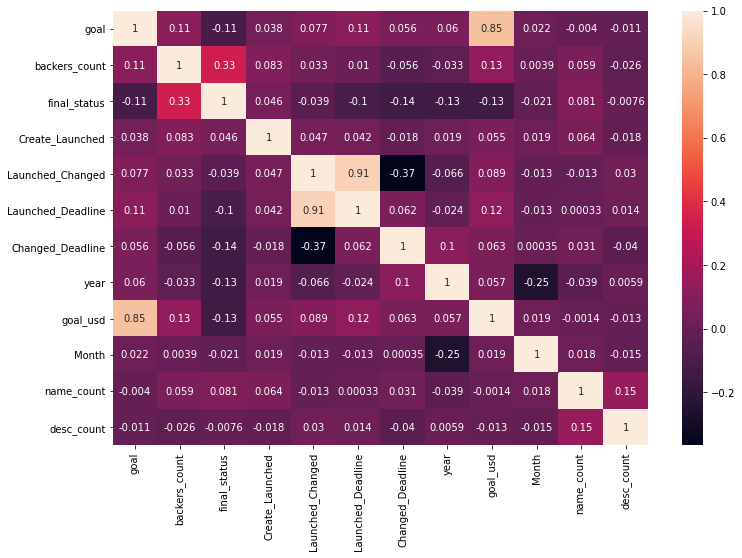

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [8]:
dfml=df.drop(columns=['name','pledged','category','Launched_Changed','usdpledged','desc','deadline','Create_Launched','state_changed_at','Changed_Deadline','created_at','launched_at','goal','year'])

In [9]:
dfml3=df.drop(columns=['pledged','category','Launched_Changed','usdpledged','deadline','Create_Launched','state_changed_at','Changed_Deadline','created_at','launched_at','goal','year'])
dfml3.to_csv("KS_ML2.csv", index=False)

In [10]:
# 'Create_Launched' 

In [11]:
# 'Launched_Changed'

In [12]:
dfml

,main_category,country,currency,backers_count,final_status,Launched_Deadline,goal_usd,Month,name_count,desc_count
0,Film & Video,US,USD,3,0,45,45000.000000,1,3,15
1,Publishing,CA,CAD,0,0,30,1923.076923,9,4,21
2,Comics,US,USD,16,0,30,1500.000000,10,2,27
3,Publishing,US,USD,20,0,30,3000.000000,4,6,21
4,Food,NO,NOK,3,0,30,55.432373,1,7,21
...,...,...,...,...,...,...,...,...,...,...
87534,Technology,US,USD,0,0,21,6500.000000,5,4,27
87535,Publishing,US,USD,31,1,43,950.000000,10,4,17
87536,Publishing,US,USD,16,0,30,4999.000000,8,4,23
87537,Music,CA,CAD,78,1,29,3846.153846,2,3,18


<AxesSubplot:>

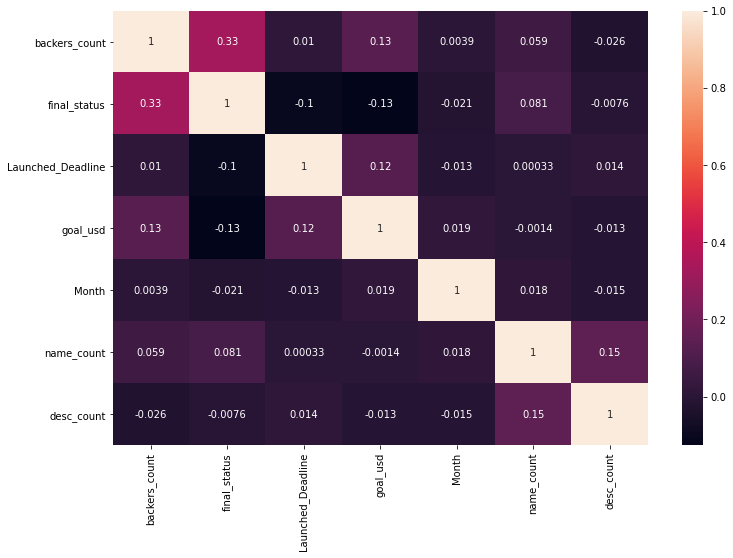

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(dfml.corr(),annot=True)

## Oversampling 

In [14]:
df['final_status'].value_counts()

from sklearn.utils import resample

fail= df[df['final_status'] == 0] ## Kelas Majority
succes = df[df['final_status'] == 1] ## Kelas Minority

succes_oversample = resample(succes, ## Kelas Minority
                           replace=True,
                           n_samples = len(fail), ## Jumlah dari Kelas Majority
                           random_state = 42)

df=pd.concat([fail, succes_oversample])

df['final_status'].value_counts()

1    60632
0    60632
Name: final_status, dtype: int64

## Encoding

In [15]:
dfml.describe()

,backers_count,final_status,Launched_Deadline,goal_usd,Month,name_count,desc_count
count,87539.000000,87539.000000,87539.000000,87539.000000,87539.000000,87539.000000,87539.000000
mean,98.516021,0.307372,32.619849,17046.046446,6.028764,5.412068,19.308765
std,317.195056,0.461407,10.941216,41193.250541,3.368548,2.740945,4.946068
min,0.000000,0.000000,1.000000,0.729927,1.000000,1.000000,1.000000
25%,2.000000,0.000000,30.000000,2000.000000,3.000000,3.000000,17.000000
50%,15.000000,0.000000,30.000000,5000.000000,6.000000,5.000000,20.000000
75%,66.000000,1.000000,34.000000,15000.000000,9.000000,7.000000,23.000000
max,4974.000000,1.000000,60.000000,500000.000000,12.000000,27.000000,35.000000


In [16]:
dfml.describe(include='O')

,main_category,country,currency
count,87539,87539,87539
unique,15,11,9
top,Film & Video,US,USD
freq,14775,71757,71757


In [17]:
dfml.columns

Index(['main_category', 'country', 'currency', 'backers_count', 'final_status',
       'Launched_Deadline', 'goal_usd', 'Month', 'name_count', 'desc_count'],
      dtype='object')

In [18]:
dfml=pd.get_dummies(data=dfml, columns=['main_category'], prefix_sep='-')
dfml=pd.get_dummies(data=dfml, columns=['country'], prefix_sep='-')
dfml=pd.get_dummies(data=dfml, columns=['currency'], prefix_sep='-')

In [19]:
dfml.columns=dfml.columns.str.replace('\s+','')
dfml.columns=dfml.columns.str.replace('&','_') 
dfml.columns=dfml.columns.str.replace('-','_') 

In [20]:
dfml

,backers_count,final_status,Launched_Deadline,goal_usd,Month,name_count,desc_count,main_category_Art,main_category_Comics,main_category_Crafts,...,country_US,currency_AUD,currency_CAD,currency_DKK,currency_EUR,currency_GBP,currency_NOK,currency_NZD,currency_SEK,currency_USD
0,3,0,45,45000.000000,1,3,15,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,30,1923.076923,9,4,21,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,16,0,30,1500.000000,10,2,27,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,20,0,30,3000.000000,4,6,21,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,3,0,30,55.432373,1,7,21,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87534,0,0,21,6500.000000,5,4,27,0,0,0,...,1,0,0,0,0,0,0,0,0,1
87535,31,1,43,950.000000,10,4,17,0,0,0,...,1,0,0,0,0,0,0,0,0,1
87536,16,0,30,4999.000000,8,4,23,0,0,0,...,1,0,0,0,0,0,0,0,0,1
87537,78,1,29,3846.153846,2,3,18,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
X = dfml.drop(columns='final_status')
y = dfml['final_status']

In [22]:
X

,backers_count,Launched_Deadline,goal_usd,Month,name_count,desc_count,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,...,country_US,currency_AUD,currency_CAD,currency_DKK,currency_EUR,currency_GBP,currency_NOK,currency_NZD,currency_SEK,currency_USD
0,3,45,45000.000000,1,3,15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,30,1923.076923,9,4,21,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,16,30,1500.000000,10,2,27,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,20,30,3000.000000,4,6,21,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,3,30,55.432373,1,7,21,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87534,0,21,6500.000000,5,4,27,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
87535,31,43,950.000000,10,4,17,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
87536,16,30,4999.000000,8,4,23,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
87537,78,29,3846.153846,2,3,18,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state = 0)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_cf=KNeighborsClassifier()
knn_cf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
print(knn_cf.score(X_train,y_train))

0.9063700361268581


In [27]:
param_KNN = {"n_neighbors" : [5, 10, 20, 30 ],
            "weights" : ["uniform", "distance"],
             "leaf_size" :[30,60,90,100],
            "p" : [1,2]}

model_knn = GridSearchCV(estimator=knn_cf, param_grid=param_KNN, n_jobs = -1, cv = 5, verbose=1,scoring='recall')
model_knn.fit(X_train, y_train)

print(model_knn.score(X_train,y_train))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 12.0min finished


0.9999073859689743


In [28]:
y_pred_knn = knn_cf.predict(X_test)
y_pred_knn_tuned = model_knn.predict(X_test)

In [29]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.8730294722412612

In [30]:
acc_knn_tuned= accuracy_score(y_test, y_pred_knn_tuned)
acc_knn_tuned

0.8859949737262965

In [31]:
cm = confusion_matrix(y_test, y_pred_knn, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_knn = precision_score(y_test, y_pred_knn)

rec_knn = recall_score(y_test, y_pred_knn, pos_label=1)

f1_knn = f1_score(y_test, y_pred_knn)

recall_score(y_test, y_pred_knn, pos_label=0)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     12196
           1       0.78      0.81      0.79      5312

    accuracy                           0.87     17508
   macro avg       0.85      0.85      0.85     17508
weighted avg       0.87      0.87      0.87     17508



In [32]:
cm = confusion_matrix(y_test, y_pred_knn_tuned, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_knn = precision_score(y_test, y_pred_knn_tuned)

rec_knn = recall_score(y_test, y_pred_knn_tuned, pos_label=1)

f1_knn = f1_score(y_test, y_pred_knn_tuned)

recall_score(y_test, y_pred_knn_tuned, pos_label=0)

print(classification_report(y_test, y_pred_knn_tuned))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     12196
           1       0.80      0.83      0.82      5312

    accuracy                           0.89     17508
   macro avg       0.86      0.87      0.87     17508
weighted avg       0.89      0.89      0.89     17508



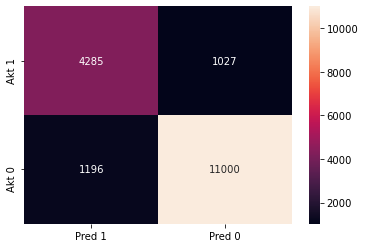

In [33]:
y_KNN = knn_cf.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_KNN, labels=[1, 0])
df_KNN = pd.DataFrame(data=cm_KNN, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN, annot=True,fmt='d')
plt.show()

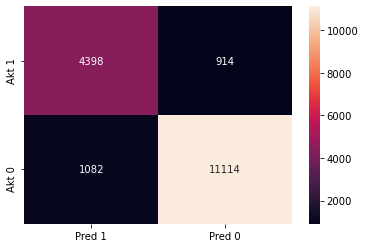

In [34]:
y_KNN = model_knn.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_KNN, labels=[1, 0])
df_KNN = pd.DataFrame(data=cm_KNN, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN, annot=True,fmt='d')
plt.show()

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
print(RF.score(X_train,y_train))

0.9999714412188888


In [42]:
param_RF = {"n_estimators" : [50,75,100],
          "max_depth" : [None, 5,10],
          "min_samples_split" : [2, 4,8],
          "min_samples_leaf" : [1, 2, 4] }

model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv = 4, n_jobs=-1, verbose=1,scoring='recall')
model_RF.fit(X_train, y_train)

print(model_RF.score(X_train, y_train))

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 11.4min finished


0.9104422319981477


In [43]:
y_pred_rf = RF.predict(X_test)
y_pred_rf_tuned=model_RF.predict(X_test)

In [44]:
acc_RF = accuracy_score(y_test, y_pred_rf)
acc_RF

0.8842243545807631

In [45]:
acc_RF_tuned = accuracy_score(y_test, y_pred_rf_tuned)
acc_RF_tuned

0.8847955220470642

In [46]:
cm = confusion_matrix(y_test, y_pred_rf, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_RF = precision_score(y_test, y_pred_rf)

rec_RF = recall_score(y_test, y_pred_rf, pos_label=1)

f1_RF = f1_score(y_test, y_pred_rf)

recall_score(y_test, y_pred_rf, pos_label=0)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     12196
           1       0.80      0.83      0.81      5312

    accuracy                           0.88     17508
   macro avg       0.86      0.87      0.86     17508
weighted avg       0.89      0.88      0.88     17508



In [47]:
cm = confusion_matrix(y_test, y_pred_rf_tuned, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_RF = precision_score(y_test, y_pred_rf)

rec_RF = recall_score(y_test, y_pred_rf, pos_label=1)

f1_RF = f1_score(y_test, y_pred_rf)

recall_score(y_test, y_pred_rf, pos_label=0)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     12196
           1       0.80      0.83      0.81      5312

    accuracy                           0.88     17508
   macro avg       0.86      0.87      0.86     17508
weighted avg       0.89      0.88      0.88     17508



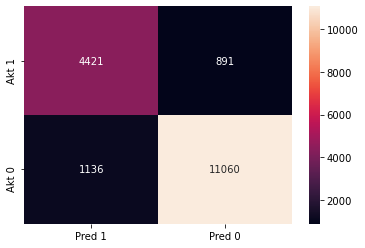

In [48]:
y_RF = RF.predict(X_test)
cm_RF = confusion_matrix(y_test, y_RF, labels=[1, 0])
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_RF, annot=True,fmt='d')
plt.show()

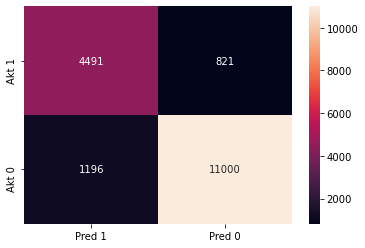

In [49]:
y_RF = model_RF.predict(X_test)
cm_RF = confusion_matrix(y_test, y_RF, labels=[1, 0])
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_RF, annot=True,fmt='d')
plt.show()

# TREE #

In [50]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
print(tree.score(X_train,y_train))

0.9999714412188888


In [52]:
param_tree = {"max_depth" : [None, 15,30,45],
          "min_samples_split" : [2,8,16],
          "min_samples_leaf" : [1,4,8],
          "max_features" : [None]}

model_tree = GridSearchCV(estimator=tree, param_grid=param_tree, cv = 4, n_jobs=-1, verbose=1,scoring='recall')
model_tree.fit(X_train, y_train)

model_tree.score(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   28.9s finished


0.8709886547811994

In [53]:
y_pred_tree = tree.predict(X_test)
y_pred_tree_tuned = model_tree.predict(X_test)

In [54]:
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_tree

0.8442997486863149

In [55]:
acc_tree_tuned = accuracy_score(y_test, y_pred_tree_tuned)
acc_tree_tuned

0.8665181631254284

In [56]:
cm = confusion_matrix(y_test, y_pred_tree, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_tree = precision_score(y_test, y_pred_tree)

rec_tree = recall_score(y_test, y_pred_tree, pos_label=1)

f1_tree = f1_score(y_test, y_pred_tree)

recall_score(y_test, y_pred_tree, pos_label=0)

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     12196
           1       0.74      0.76      0.75      5312

    accuracy                           0.84     17508
   macro avg       0.82      0.82      0.82     17508
weighted avg       0.85      0.84      0.84     17508



In [57]:
cm = confusion_matrix(y_test, y_pred_tree_tuned, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_tree = precision_score(y_test, y_pred_tree_tuned)

rec_tree = recall_score(y_test, y_pred_tree_tuned, pos_label=1)

f1_tree = f1_score(y_test, y_pred_tree_tuned)

recall_score(y_test, y_pred_tree_tuned, pos_label=0)

print(classification_report(y_test, y_pred_tree_tuned))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     12196
           1       0.78      0.79      0.78      5312

    accuracy                           0.87     17508
   macro avg       0.84      0.84      0.84     17508
weighted avg       0.87      0.87      0.87     17508



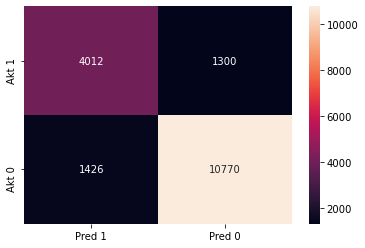

In [58]:
y_tree = tree.predict(X_test)
cm_tree = confusion_matrix(y_test, y_tree, labels=[1, 0])
df_tree = pd.DataFrame(data=cm_tree, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_tree, annot=True,fmt='d')
plt.show()

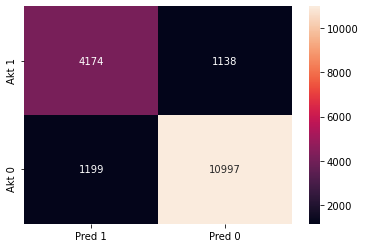

In [59]:
y_tree = model_tree.predict(X_test)
cm_tree = confusion_matrix(y_test, y_tree, labels=[1, 0])
df_tree = pd.DataFrame(data=cm_tree, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_tree, annot=True,fmt='d')
plt.show()

# AUC

In [60]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [61]:
y_pred_tree= model_tree.predict(X_test)

In [62]:
roc_auc_score(y_test, y_pred_rf_tuned)

0.8736896688920325

In [63]:
y_proba_RF = model_RF.predict_proba(X_test)

In [64]:
pred_1 = y_proba_RF[ : , 1]

In [65]:
roc_curve(y_test, pred_1)

(array([0.        , 0.        , 0.        , ..., 0.99975402, 0.99983601,
        1.        ]),
 array([0.00000000e+00, 1.88253012e-04, 7.34186747e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.96951554e+00, 9.69515539e-01, 9.44433280e-01, ...,
        3.11678752e-04, 2.45897036e-04, 2.08722315e-04]))

In [66]:
fpr, tpr, threshold = roc_curve(y_test, pred_1)

In [67]:
score_auc = round(auc(fpr, tpr),2)

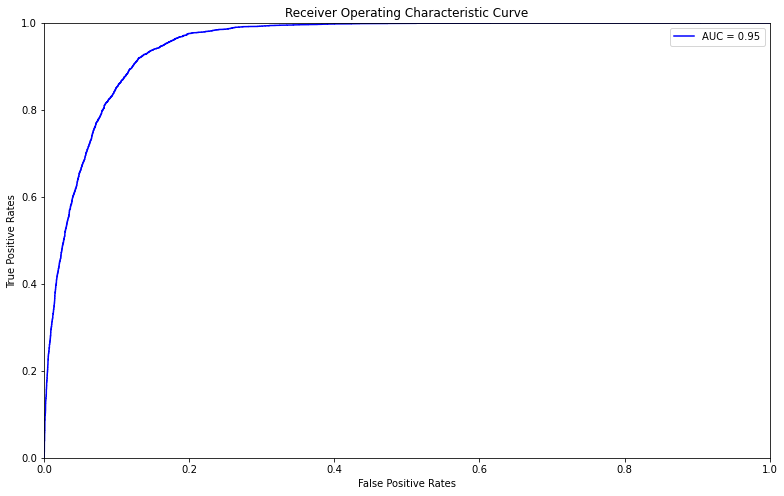

In [68]:
plt.figure(figsize=(13, 8))
plt.plot(fpr, tpr, 'b', label=f"AUC = {score_auc}")
# plt.plot([0, 1], [0, 1], 'r-.')
plt.xlim([0 , 1])
plt.ylim([0 , 1])
plt.xlabel("False Positive Rates")
plt.ylabel("True Positive Rates")
plt.title("Receiver Operating Characteristic Curve")
plt.legend()
plt.show()

In [69]:
### Saya akan menggunakan Model Random Forest

import joblib

joblib.dump(RF,'modelRF')

model = joblib.load('modelRF')

model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)